In [97]:
import pandas as pd

movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

import sqlite3
conn = sqlite3.connect("zippedData/im.db")

import matplotlib.pyplot as plt

In [127]:
movie_budget
# checking out the data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [129]:
genre_df
# checking out the data

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


In [100]:
genre_df = pd.read_sql("""
SELECT primary_title, start_year, runtime_minutes, genres
FROM movie_basics

""",conn)
# only chooseing column we want and need

In [130]:
df = genre_df.set_index('primary_title').join(movie_budget.set_index('movie'), how = 'inner')
# joining the 2 dataframe into 1 datafram on the index on the titles

In [131]:
df.reset_index(inplace=True)
#  resetting the index

In [132]:
df

,index,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,2015,101.0,"Crime,Drama,Horror",16,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,2015,111.0,Drama,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,2017,NaN,"Action,Drama,Romance",37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,2018,130.0,"Action,Drama,History",64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
...,...,...,...,...,...,...,...,...,...
3810,Zoom,2016,NaN,"Crime,Thriller",26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188"
3811,Zoom,2016,NaN,Horror,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188"
3812,Zootopia,2016,108.0,"Adventure,Animation,Comedy",57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616"
3813,Zulu,2013,110.0,"Crime,Drama,Thriller",82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228"


In [134]:
dup = df[df.duplicated()]
print(len(dup))
# checking to see if we have duplicated or not 

5


In [135]:
df.drop_duplicates()
# droping the duplicates because it was a low number,5 

,index,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,2015,101.0,"Crime,Drama,Horror",16,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,2015,111.0,Drama,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,2017,NaN,"Action,Drama,Romance",37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,2018,130.0,"Action,Drama,History",64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
...,...,...,...,...,...,...,...,...,...
3810,Zoom,2016,NaN,"Crime,Thriller",26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188"
3811,Zoom,2016,NaN,Horror,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188"
3812,Zootopia,2016,108.0,"Adventure,Animation,Comedy",57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616"
3813,Zulu,2013,110.0,"Crime,Drama,Thriller",82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228"


In [136]:
df.info()
# checking to see if we have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3815 non-null   object 
 1   start_year         3815 non-null   int64  
 2   runtime_minutes    3328 non-null   float64
 3   genres             3743 non-null   object 
 4   id                 3815 non-null   int64  
 5   release_date       3815 non-null   object 
 6   production_budget  3815 non-null   object 
 7   domestic_gross     3815 non-null   object 
 8   worldwide_gross    3815 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 268.4+ KB


In [137]:
df.dropna(subset=["runtime_minutes"], inplace=True)

In [138]:
df.info()
# checking to see if we need to change any datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3328 non-null   object 
 1   start_year         3328 non-null   int64  
 2   runtime_minutes    3328 non-null   float64
 3   genres             3309 non-null   object 
 4   id                 3328 non-null   int64  
 5   release_date       3328 non-null   object 
 6   production_budget  3328 non-null   object 
 7   domestic_gross     3328 non-null   object 
 8   worldwide_gross    3328 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 260.0+ KB


In [139]:
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
# removing the '$' and ',' from the columns in worldwide_gross

In [140]:
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
# removing the '$' and ',' from the columns in domestic_gross

In [141]:
df['worldwide_gross'] = df['worldwide_gross'].astype(float)
df['domestic_gross'] = df['domestic_gross'].astype(float)
# Changing them both to the float datatype

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3328 non-null   object 
 1   start_year         3328 non-null   int64  
 2   runtime_minutes    3328 non-null   float64
 3   genres             3309 non-null   object 
 4   id                 3328 non-null   int64  
 5   release_date       3328 non-null   object 
 6   production_budget  3328 non-null   object 
 7   domestic_gross     3328 non-null   float64
 8   worldwide_gross    3328 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 260.0+ KB


# Is there a correlation between the runtime of a movie and the amount of money it can make, Do people like to watch longer movies?

In [143]:
df.corr()
# checking the correalation between the element in the dataframe

,start_year,runtime_minutes,id,domestic_gross,worldwide_gross
start_year,1.000000,-0.019090,0.024787,0.034880,0.028829
runtime_minutes,-0.019090,1.000000,-0.023610,0.146478,0.160623
id,0.024787,-0.023610,1.000000,0.004275,-0.010322
domestic_gross,0.034880,0.146478,0.004275,1.000000,0.947284
worldwide_gross,0.028829,0.160623,-0.010322,0.947284,1.000000


In [159]:
df['runtime_minutes'].value_counts().head(10)
# getting the top 10 runtime of movies

90.0     156
100.0     96
92.0      83
95.0      82
93.0      81
106.0     71
97.0      69
105.0     68
98.0      65
110.0     63
Name: runtime_minutes, dtype: int64

In [160]:
df.loc[df['runtime_minutes'].value_counts().head(10)]

,index,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
156,All or Nothing,2017,107.0,"Comedy,Romance",14,"Oct 25, 2002","$9,000,000",184255.0,184255.0
96,Adam,2018,72.0,Drama,59,"Jul 29, 2009","$3,200,000",2283291.0,2834485.0
83,Absentia,2011,87.0,"Drama,Horror,Mystery",6,"Dec 31, 2011","$70,000",0.0,8555.0
82,Abraham Lincoln: Vampire Hunter,2012,105.0,"Action,Fantasy,Horror",65,"Jun 22, 2012","$67,500,000",37519139.0,137489730.0
81,Above and Beyond,2014,56.0,Documentary,38,"Jan 30, 2015","$1,300,000",288751.0,288751.0
71,Abduction,2011,106.0,"Action,Mystery,Thriller",96,"Sep 23, 2011","$35,000,000",28087155.0,86648359.0
69,ABCD (Any Body Can Dance),2013,160.0,"Drama,Music",11,"Feb 8, 2013","$1,900,000",222098.0,10137234.0
68,A.C.O.R.N.S.: Operation Crackdown,2015,83.0,"Animation,Comedy,Family",51,"Nov 1, 2016","$8,500,000",0.0,1353287.0
65,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014","$28,000,000",26017685.0,62108587.0
63,A True Story,2013,96.0,Comedy,27,"Oct 25, 2013","$45,000",0.0,0.0


In [157]:
df['runtime_minutes'].mean()
# the average run time of all the movie in the dataset

97.20462740384616

In [151]:
df['worldwide_gross'].value_counts().head(10)

0.0            318
385997896.0     22
44793168.0      22
5953886.0       15
44567606.0       9
17856688.0       9
45043870.0       9
19800.0          9
58978477.0       9
23726626.0       8
Name: worldwide_gross, dtype: int64

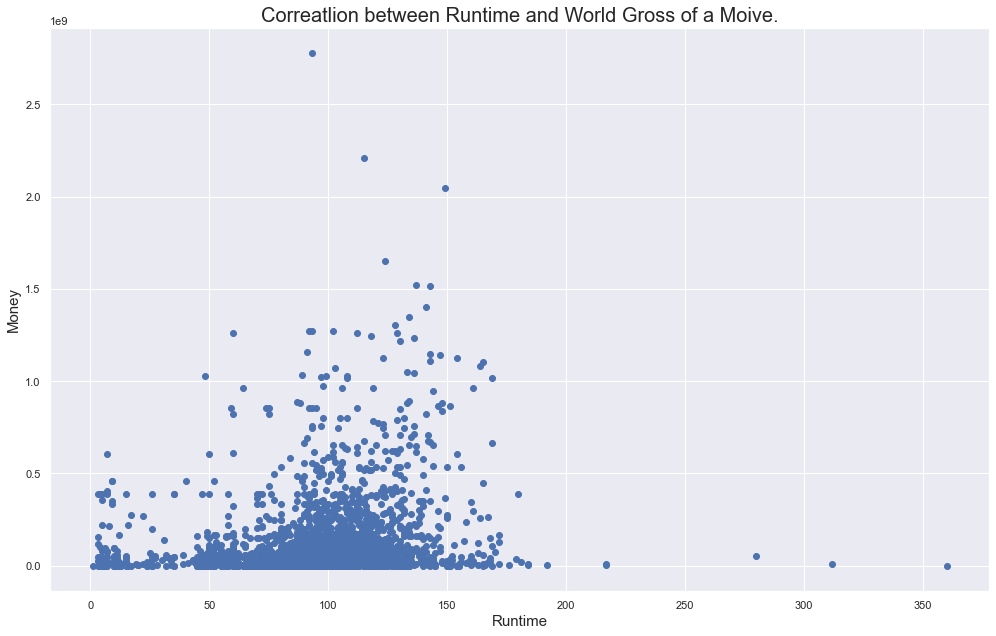

In [144]:
fig, ax = plt.subplots(figsize = (14,9))

ax.scatter(x=df['runtime_minutes'],y=df['worldwide_gross'])
ax.set_title('Correatlion between Runtime and World Gross of a Moive.', fontsize=20)
ax.set_xlabel('Runtime', fontsize=15)
ax.set_ylabel('Money', fontsize=15)

    
fig.tight_layout();



In [145]:
import seaborn as sns

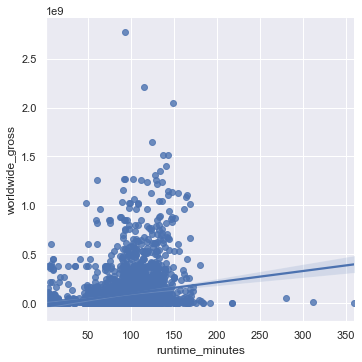

In [146]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lmplot(x='runtime_minutes',y='worldwide_gross',data=df);